In [94]:
import urllib
import os
import pathlib
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
DATA_ROOT = '../data/'
READ_DIR = os.path.join(DATA_ROOT, 'raw/bos_analyze')
WRITE_DIR = os.path.join(DATA_ROOT, 'interim')
readfile_prop = os.path.join(READ_DIR, 'property_assess/fy19fullpropassess.csv')
readfile_sam = os.path.join(READ_DIR, 'SAMaddresses.csv')

print(readfile_prop, readfile_sam)

../data/raw/bos_analyze/property_assess/fy19fullpropassess.csv ../data/raw/bos_analyze/SAMaddresses.csv


In [197]:
df_sam = pd.read_csv(readfile_sam, dtype=str)
df_prop = pd.read_csv(readfile_prop, dtype=str)

In [198]:
df_sam['X'] = df_sam['X'].astype(float)
df_sam['Y'] = df_sam['Y'].astype(float)

In [199]:
print(df_sam.info())
print()
print(df_prop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398702 entries, 0 to 398701
Data columns (total 27 columns):
X                       398702 non-null float64
Y                       398702 non-null float64
SAM_ADDRESS_ID          398702 non-null object
RELATIONSHIP_TYPE       398702 non-null object
BUILDING_ID             398702 non-null object
FULL_ADDRESS            398702 non-null object
STREET_NUMBER           398702 non-null object
IS_RANGE                398702 non-null object
RANGE_FROM              26175 non-null object
RANGE_TO                26175 non-null object
UNIT                    270100 non-null object
FULL_STREET_NAME        398702 non-null object
STREET_ID               398702 non-null object
STREET_PREFIX           398702 non-null object
STREET_BODY             398702 non-null object
STREET_SUFFIX_ABBR      394519 non-null object
STREET_FULL_SUFFIX      394519 non-null object
STREET_SUFFIX_DIR       398702 non-null object
STREET_NUMBER_SORT      398702 non-null obj

In [200]:
df_sam.head()

,X,Y,SAM_ADDRESS_ID,RELATIONSHIP_TYPE,BUILDING_ID,FULL_ADDRESS,STREET_NUMBER,IS_RANGE,RANGE_FROM,RANGE_TO,...,STREET_SUFFIX_DIR,STREET_NUMBER_SORT,MAILING_NEIGHBORHOOD,ZIP_CODE,X_COORD,Y_COORD,SAM_STREET_ID,WARD,PRECINCT_WARD,PARCEL
0,-71.125037,42.250627,1,1,100778,6-10 A St,6-10,1,6,10,...,,10,Hyde Park,02136,757684.428549561,2916575.26204486,1,18,1818,1809309000
1,-71.124891,42.250328,2,1,126344,15 A St,15,0,NaN,NaN,...,,15,Hyde Park,02136,757724.178237994,2916466.7927758,1,18,1818,1809331000
2,-71.125401,42.250469,4,1,100797,7 A St,7,0,NaN,NaN,...,,7,Hyde Park,02136,757586.116749272,2916517.2874641,1,18,1818,1809337000
3,-71.056801,42.340889,11,1,154909,10 A St,10,0,NaN,NaN,...,,10,South Boston,02127,775987.55932641,2949556.68074288,2,06,0601,0600090000
4,-71.053149,42.344846,16,1,141250,172-174 A St,172-174,1,172,174,...,,172,Boston,02210,776967.328447327,2951003.83399223,2,06,0601,0602743000


In [201]:
df_prop.head()

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,0502550008,502550000,502550000,87,BEACON,ST,2-F,2108,102,CD,...,M,NaN,O,M,W,N,1,N,G,A
1,0502550010,502550000,502550000,87,BEACON,ST,2-R,2108,102,CD,...,NaN,NaN,O,S,W,N,1,N,A,A
2,0502550012,502550000,502550000,87,BEACON,ST,3-F,2108,102,CD,...,S,NaN,O,M,W,N,1,N,A,G
3,0502550014,502550000,502550000,87,BEACON,ST,3-R,2108,102,CD,...,NaN,NaN,O,N,W,N,1,S,A,G
4,0502550016,502550000,502550000,87,BEACON,ST,4,2108,102,CD,...,M,M,O,L,W,C,2,N,E,G


In [196]:
# df_prop['ST_NAME_SUF'] = df_prop['ST_NAME_SUF'].fillna('')
# df_prop['ZIPCODE'] = '0' + df_prop['ZIPCODE']
# df_prop['addr_lower'] = df_prop['ST_NUM'].str.lower() + ' ' + df_prop['ST_NAME'].str.lower() + ' ' + df_prop['ST_NAME_SUF'].str.lower()
# df_prop['is_prop'] = 1
# df_sam['is_sam'] = 1
# df_sam['GIS_ID'] = df_sam['PARCEL'].copy().str[1:]
# df_sam['PID'] = df_sam['PARCEL'].copy()
# df_sam['addr_lower'] = df_sam['FULL_ADDRESS'].str.lower()

In [202]:
df_prop['ST_NAME_SUF'] = df_prop['ST_NAME_SUF'].fillna('')
df_prop['ZIPCODE'] = '0' + df_prop['ZIPCODE']
df_prop['addr_lower'] = df_prop['ST_NUM'].str.strip() + ' ' + df_prop['ST_NAME'].str.strip() + ' ' + df_prop['ST_NAME_SUF'].str.strip()
df_prop['addr_lower'] = df_prop['addr_lower'].str.lower()
df_prop['is_prop'] = 1
df_sam['is_sam'] = 1
df_sam['GIS_ID'] = df_sam['PARCEL'].copy().str[1:]
df_sam['PID'] = df_sam['PARCEL'].copy()
df_sam['addr_lower'] = df_sam['FULL_ADDRESS'].str.strip()
df_sam['addr_lower'] = df_sam['addr_lower'].str.lower() 

In [203]:
df_GIS_ID_unique = df_sam.groupby('GIS_ID').agg(
    {
        'X': 'first',
        'Y': 'first',
        'X_COORD': 'first',
        'Y_COORD': 'first',
        'is_sam': 'first',
#         'is_sam': np.sum
    }
)

df_PID_unique = df_sam.groupby('PID').agg(
    {
        'X': 'first',
        'Y': 'first',
        'X_COORD': 'first',
        'Y_COORD': 'first',
        'is_sam': 'first',
#         'is_sam': np.sum
    }
)

df_st_name_unique = df_sam.groupby('addr_lower').agg(
    {
        'X': 'first',
        'Y': 'first',
        'X_COORD': 'first',
        'Y_COORD': 'first',
        'is_sam': 'first',
#         'is_sam': np.sum
    }
)

In [204]:
df_merge_PID = pd.merge(df_prop, df_PID_unique, on='PID', how='left')

In [205]:
df_merge_PID.shape, int(df_merge_PID['is_sam'].sum())

((174668, 82), 88558)

In [206]:
df_merge_nomatch = df_merge_PID.loc[df_merge_PID['is_sam'] != 1].copy().drop(
    columns=['X', 'Y', 'X_COORD', 'Y_COORD', 'is_sam']
)
df_merge = df_merge_PID.loc[df_merge_PID['is_sam'] == 1].copy()

In [207]:
df_merge_PID_GIS = pd.merge(df_merge_nomatch, df_PID_unique, left_on='GIS_ID', right_on='PID', how='left')

In [208]:
df_merge.shape, df_merge_PID_GIS.shape, int(df_merge_PID_GIS['is_sam'].sum())

((88558, 82), (86110, 82), 25113)

In [209]:
df_merge_nomatch = df_merge_PID_GIS.loc[df_merge_PID_GIS['is_sam'] != 1].copy().drop(
    columns=['X', 'Y', 'X_COORD', 'Y_COORD', 'is_sam']
)
df_merge = pd.concat([
    df_merge.copy(),
    df_merge_PID_GIS.loc[df_merge_PID_GIS['is_sam'] == 1].copy(),
])

In [210]:
df_merge_GIS = pd.merge(df_merge_nomatch, df_GIS_ID_unique, on='GIS_ID', how='left')

In [211]:
df_merge.shape, df_merge_GIS.shape, int(df_merge_GIS['is_sam'].sum())

((113671, 82), (60997, 82), 47316)

In [212]:
df_merge_nomatch = df_merge_GIS.loc[df_merge_GIS['is_sam'] != 1].copy().drop(
    columns=['X', 'Y', 'X_COORD', 'Y_COORD', 'is_sam']
)
df_merge = pd.concat([
    df_merge.copy(),
    df_merge_GIS.loc[df_merge_GIS['is_sam'] == 1].copy(),
])

In [213]:
df_merge_addr = pd.merge(df_merge_nomatch, df_st_name_unique, on='addr_lower', how='left')

In [214]:
df_merge.shape, df_merge_addr.shape, int(df_merge_addr['is_sam'].sum())

((160987, 82), (13681, 82), 1720)

In [235]:
df_merge_nomatch = df_merge_addr.loc[df_merge_addr['is_sam'] != 1].copy().drop(
    columns=['X', 'Y', 'X_COORD', 'Y_COORD', 'is_sam']
)
df_merge = pd.concat([
    df_merge.copy(),
    df_merge_addr.loc[df_merge_addr['is_sam'] == 1].copy(),
])

In [236]:
df_merge.shape, df_merge_nomatch.shape

((162707, 82), (11961, 77))

In [215]:
df_merge_addr.loc[df_merge_addr['is_sam']!=1]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_INT_FIN,U_INT_CND,U_VIEW,addr_lower,is_prop,X,Y,X_COORD,Y_COORD,is_sam
0,0100179002,NaN,100179002,,PRINCETON,ST,NaN,02128,132,RL,...,NaN,NaN,NaN,princeton st,1,NaN,NaN,NaN,NaN,NaN
1,0100289000,NaN,100289000,,PRINCETON,ST,NaN,02128,106,RL,...,NaN,NaN,NaN,princeton st,1,NaN,NaN,NaN,NaN,NaN
2,0100290000,NaN,100290000,,PRINCETON,ST,NaN,02128,316,C,...,NaN,NaN,NaN,princeton st,1,NaN,NaN,NaN,NaN,NaN
3,0100335000,NaN,100335000,,BREMEN,ST,NaN,02128,337,CL,...,NaN,NaN,NaN,bremen st,1,NaN,NaN,NaN,NaN,NaN
4,0100344000,NaN,100344000,368,BREMEN,ST,NaN,02128,337,CL,...,NaN,NaN,NaN,368 bremen st,1,NaN,NaN,NaN,NaN,NaN
5,0100352000,NaN,100352000,,NEPTUNE,RD,NaN,02128,985,E,...,NaN,NaN,NaN,neptune rd,1,NaN,NaN,NaN,NaN,NaN
6,0100357000,NaN,100357000,36,NEPTUNE,RD,NaN,02128,985,E,...,NaN,NaN,NaN,36 neptune rd,1,NaN,NaN,NaN,NaN,NaN
7,0100359001,NaN,100359001,405,FRANKFORT,ST,NaN,02128,902,E,...,NaN,NaN,NaN,405 frankfort st,1,NaN,NaN,NaN,NaN,NaN
8,0100359002,NaN,100359002,409,FRANKFORT,ST,NaN,02128,985,E,...,NaN,NaN,NaN,409 frankfort st,1,NaN,NaN,NaN,NaN,NaN
9,0100359005,NaN,100359005,,NEPTUNE,RD,NaN,02128,901,E,...,NaN,NaN,NaN,neptune rd,1,NaN,NaN,NaN,NaN,NaN


In [216]:
df_merge_addr.loc[(df_merge_addr['is_sam']!=1) & (df_merge_addr['ZIPCODE']=='00002132')]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_INT_FIN,U_INT_CND,U_VIEW,addr_lower,is_prop,X,Y,X_COORD,Y_COORD,is_sam


In [217]:
df_prop.loc[df_prop['addr_lower'].isnull()]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW,addr_lower,is_prop


In [221]:
df_merge_addr.iloc[1]['ST_NUM']

'   '

In [156]:
df_merge_addr.loc[df_merge_addr['ST_NUM'].str.strip().isnull()]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_INT_FIN,U_INT_CND,U_VIEW,is_prop,addr_lower,X,Y,X_COORD,Y_COORD,is_sam


In [154]:
df_sam.loc[df_sam['STREET_NUMBER'].isnull()]

,X,Y,SAM_ADDRESS_ID,RELATIONSHIP_TYPE,BUILDING_ID,FULL_ADDRESS,STREET_NUMBER,IS_RANGE,RANGE_FROM,RANGE_TO,...,X_COORD,Y_COORD,SAM_STREET_ID,WARD,PRECINCT_WARD,PARCEL,is_sam,GIS_ID,PID,addr_lower


In [152]:
df_merge_addr.loc[(df_merge_addr['is_sam']!=1) & (df_merge_addr['ST_NUM'].isnull())]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_INT_FIN,U_INT_CND,U_VIEW,is_prop,addr_lower,X,Y,X_COORD,Y_COORD,is_sam


In [144]:
df_merge_addr.loc[df_merge_addr['is_sam']!=1]['ZIPCODE'].value_counts()

00002132    1539
00002124    1033
00002136     919
00002119     859
00002130     768
00002125     676
00002126     661
00002131     607
00002121     604
00002128     587
00002122     515
00002129     430
00002210     402
00002135     389
00002127     366
00002115     321
00002118     269
00002120     266
00002134     177
00002215     126
00002111     123
00002116     106
00002114      69
00002110      54
00002109      43
00002113      39
00002467      36
00002108       8
00002201       2
00002112       1
00002090       1
Name: ZIPCODE, dtype: int64

In [87]:
df_merge_GIS.loc[df_merge_GIS['is_sam']!=1]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW,is_prop,X,Y,X_COORD,Y_COORD,is_sam
74,0100179002,NaN,100179002,,PRINCETON,ST,NaN,002128,132,RL,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
100,0100289000,NaN,100289000,,PRINCETON,ST,NaN,002128,106,RL,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
101,0100290000,NaN,100290000,,PRINCETON,ST,NaN,002128,316,C,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
103,0100335000,NaN,100335000,,BREMEN,ST,NaN,002128,337,CL,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
104,0100344000,NaN,100344000,368,BREMEN,ST,NaN,002128,337,CL,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
105,0100352000,NaN,100352000,,NEPTUNE,RD,NaN,002128,985,E,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
107,0100357000,NaN,100357000,36,NEPTUNE,RD,NaN,002128,985,E,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
109,0100359001,NaN,100359001,405,FRANKFORT,ST,NaN,002128,902,E,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
110,0100359002,NaN,100359002,409,FRANKFORT,ST,NaN,002128,985,E,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
111,0100359005,NaN,100359005,,NEPTUNE,RD,NaN,002128,901,E,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [68]:
df_merge_PID_GIS.loc[df_merge_PID_GIS['is_sam']!=1]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW,is_prop,X,Y,X_COORD,Y_COORD,is_sam
0,0502550008,502550000,502550000,87,BEACON,ST,2-F,002108,102,CD,...,1,N,G,A,1,NaN,NaN,NaN,NaN,NaN
1,0502550010,502550000,502550000,87,BEACON,ST,2-R,002108,102,CD,...,1,N,A,A,1,NaN,NaN,NaN,NaN,NaN
2,0502550012,502550000,502550000,87,BEACON,ST,3-F,002108,102,CD,...,1,N,A,G,1,NaN,NaN,NaN,NaN,NaN
3,0502550014,502550000,502550000,87,BEACON,ST,3-R,002108,102,CD,...,1,S,A,G,1,NaN,NaN,NaN,NaN,NaN
4,0502550016,502550000,502550000,87,BEACON,ST,4,002108,102,CD,...,2,N,E,G,1,NaN,NaN,NaN,NaN,NaN
5,0502551002,502551000,502551000,88,BEACON,ST,1,002108,102,CD,...,0,N,A,F,1,NaN,NaN,NaN,NaN,NaN
6,0502551004,502551000,502551000,88,BEACON,ST,2,002108,102,CD,...,1,N,A,F,1,NaN,NaN,NaN,NaN,NaN
7,0502551006,502551000,502551000,88,BEACON,ST,3,002108,102,CD,...,2,E,E,E,1,NaN,NaN,NaN,NaN,NaN
8,0502551008,502551000,502551000,88,BEACON,ST,4,002108,102,CD,...,0,N,A,E,1,NaN,NaN,NaN,NaN,NaN
9,0502551010,502551000,502551000,88,BEACON,ST,5,002108,102,CD,...,0,N,E,E,1,NaN,NaN,NaN,NaN,NaN


In [23]:
df_merge_GIS_ID = pd.merge(df_prop, df_GIS_ID_unique, on='GIS_ID', how='left')
df_merge_PID = pd.merge(df_prop, df_PID_unique, on='PID', how='left')

In [26]:
df_merge_GIS_ID['is_sam'].sum(), df_merge_PID['is_sam'].sum()

(73795.0, 88558.0)

In [39]:
df_sam_nonull = df_sam.dropna(subset=['PARCEL'])

96 UDINE
PARCEL = 2205589000
PID, CM_ID, GIS_ID = 2205589002 	2205589000 	2205589000

87 BEACON
PARCEL = 0502550000
PID, CM_ID, GIS_ID = 0502550008 	502550000 	502550000

In [92]:
df_sam.loc[df_sam['FULL_STREET_NAME'].str.contains('Bremen')]

,X,Y,SAM_ADDRESS_ID,RELATIONSHIP_TYPE,BUILDING_ID,FULL_ADDRESS,STREET_NUMBER,IS_RANGE,RANGE_FROM,RANGE_TO,...,ZIP_CODE,X_COORD,Y_COORD,SAM_STREET_ID,WARD,PRECINCT_WARD,PARCEL,is_sam,GIS_ID,PID
15183,-71.038819584600006,42.3688616759,19756,1,131235,10 Bremen St,10,0,NaN,NaN,...,02128,780793.630914882,2959776.3344484,544,01,0103,0105363000,1,105363000,0105363000
15184,-71.036440584,42.371188676599999,19757,1,129976,102 Bremen St,102,0,NaN,NaN,...,02128,781431.903491482,2960627.82436918,544,01,0104,0103813000,1,103813000,0103813000
15185,-71.036390584399996,42.371228675799998,19758,1,129975,104 Bremen St,104,0,NaN,NaN,...,02128,781445.335235491,2960642.47428919,544,01,0104,0103812000,1,103812000,0103812000
15186,-71.036350584299996,42.371268675800003,19759,1,129974,106 Bremen St,106,0,NaN,NaN,...,02128,781456.064867496,2960657.10984121,544,01,0104,0103811000,1,103811000,0103811000
15187,-71.036300583799999,42.371308675900003,19760,1,129973,108 Bremen St,108,0,NaN,NaN,...,02128,781469.496835515,2960671.76011322,544,01,0104,0103810000,1,103810000,0103810000
15188,-71.038510584600004,42.368818675699998,19761,2,131207,11 Bremen St # 13,11,0,NaN,NaN,...,02128,780877.217282966,2959761.11595237,544,01,0103,0105336000,1,105336000,0105336000
15189,-71.036240583700007,42.371348676,19762,1,129972,110 Bremen St,110,0,NaN,NaN,...,02128,781485.63088353,2960686.42507324,544,01,0104,0103809000,1,103809000,0103809000
15190,-71.036190584099998,42.371388676,19763,1,129971,112 Bremen St,112,0,NaN,NaN,...,02128,781499.062563539,2960701.07534525,544,01,0104,0103808000,1,103808000,0103808000
15191,-71.036150584,42.371438676499999,19764,1,129970,114 Bremen St,114,0,NaN,NaN,...,02128,781509.772323549,2960719.35531327,544,01,0104,0103807000,1,103807000,0103807000
15192,-71.036110583899998,42.371478676599999,19765,1,129969,116 Bremen St,116,0,NaN,NaN,...,02128,781520.501891568,2960733.99089728,544,01,0104,0103806000,1,103806000,0103806000


In [90]:
df_sam.loc[(df_sam['FULL_STREET_NAME'].str.contains('bremen')) & (df_sam['STREET_NUMBER']=='368') ]

,X,Y,SAM_ADDRESS_ID,RELATIONSHIP_TYPE,BUILDING_ID,FULL_ADDRESS,STREET_NUMBER,IS_RANGE,RANGE_FROM,RANGE_TO,...,ZIP_CODE,X_COORD,Y_COORD,SAM_STREET_ID,WARD,PRECINCT_WARD,PARCEL,is_sam,GIS_ID,PID


In [123]:
df_prop.loc[df_prop['PID'].str.contains('10017900')]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW,is_prop
310,0100179000,NaN,100179000,324,PRINCETON,ST,NaN,0002128,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
311,0100179001,NaN,100179001,322,PRINCETON,ST,NaN,0002128,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
312,0100179002,NaN,100179002,,PRINCETON,ST,NaN,0002128,132,RL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
82219,1100179000,1100179000,1100179000,88,CEDAR,ST,NaN,0002119,995,CM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
82220,1100179002,1100179000,1100179000,88,CEDAR,ST,1,0002119,102,CD,...,NaN,O,S,F,N,0,N,A,A,1
82221,1100179004,1100179000,1100179000,88,CEDAR,ST,2,0002119,102,CD,...,NaN,O,M,F,C,0,N,G,A,1
82222,1100179006,1100179000,1100179000,88,CEDAR,ST,3,0002119,102,CD,...,NaN,O,S,F,C,0,N,A,A,1
82223,1100179008,1100179000,1100179000,88,CEDAR,ST,4,0002119,102,CD,...,NaN,O,S,F,N,0,N,A,A,1


In [149]:
df_sam_nonull.loc[df_sam_nonull['PARCEL'].str.contains('2000')]

,X,Y,SAM_ADDRESS_ID,RELATIONSHIP_TYPE,BUILDING_ID,FULL_ADDRESS,STREET_NUMBER,IS_RANGE,RANGE_FROM,RANGE_TO,...,ZIP_CODE,X_COORD,Y_COORD,SAM_STREET_ID,WARD,PRECINCT_WARD,PARCEL,is_sam,GIS_ID,PID
5,-71.053060587900006,42.344966671100003,17,1,141252,176-178 A St,176-178,1,176,178,...,02210,776990.88694334,2951048.05328827,2,06,0601,0602742000,1,602742000,0602742000
7,-71.050817587300003,42.347030671399999,23,2,141257,249-259 A St,249-259,1,249,259,...,02210,777593.285215899,2951803.39760897,2,06,0601,0602752000,1,602752000,0602752000
32,-71.055740588899994,42.341468670099999,52,1,154923,45 A St,45,0,NaN,NaN,...,02127,776273.030910671,2949769.53386307,2,06,0601,0600132000,1,600132000,0600132000
34,-71.054840588499999,42.341968669899998,55,1,154910,69-71 A St,69-71,1,69,71,...,02127,776515.394142896,2949953.01130325,2,06,0601,0600092000,1,600092000,0600092000
40,-71.054567588400005,42.342455669899998,61,2,155573,87 A St,87,0,NaN,NaN,...,02127,776588.272062972,2950130.86813541,2,06,0601,0601232000,1,601232000,0601232000
47,-71.086120596399994,42.296828660499997,68,1,207276,19 Abbot St,19,0,NaN,NaN,...,02124,768138.754039094,2933460.64971988,3,14,1409,1401972000,1,401972000,1401972000
48,-71.086120596399994,42.296828660499997,69,2,207276,19 Abbot St #1,19,0,NaN,NaN,...,02124,768138.754039094,2933460.64971988,3,14,1409,1401972000,1,401972000,1401972000
49,-71.086120596399994,42.296828660499997,70,2,207276,19 Abbot St #2,19,0,NaN,NaN,...,02124,768138.754039094,2933460.64971988,3,14,1409,1401972000,1,401972000,1401972000
63,-71.085380596199997,42.296308660800001,84,1,183986,28 Abbot St,28,0,NaN,NaN,...,02124,768339.874967292,2933272.1262957,3,14,1407,1401922000,1,401922000,1401922000
67,-71.085330595599999,42.296068660400003,88,1,183984,32 Abbot St,32,0,NaN,NaN,...,02124,768353.827415302,2933184.73231162,3,14,1407,1401920000,1,401920000,1401920000


In [46]:
df_merge_PID.loc[(df_merge_PID['is_sam'].isnull()) & df_merge_PID['ST_NAME'].str.contains('UNDINE')]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW,is_prop,X,Y,X_COORD,Y_COORD,is_sam
174569,2205589002,2205589000,2205589000,96,UNDINE,ST,1,002135,102,CD,...,0,N,A,A,1,NaN,NaN,NaN,NaN,NaN
174570,2205589004,2205589000,2205589000,96,UNDINE,ST,2,002135,102,CD,...,0,N,A,A,1,NaN,NaN,NaN,NaN,NaN
174586,2205606000,NaN,2205606000,,UNDINE,RD,NaN,002135,132,RL,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
174604,2205624000,NaN,2205624000,,UNDINE,RD,NaN,002135,906,E,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
174605,2205625000,NaN,2205625000,,UNDINE,RD,NaN,002135,906,E,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN


In [232]:
df_locs = df_sam[['X', 'Y', 'FULL_STREET_NAME', 'STREET_ID']].sort_values(by=['STREET_ID', 'X', 'Y'])
print(df_locs.shape)
df_locs = df_locs.drop_duplicates()
print(len(df_locs))

(398702, 4)
175354


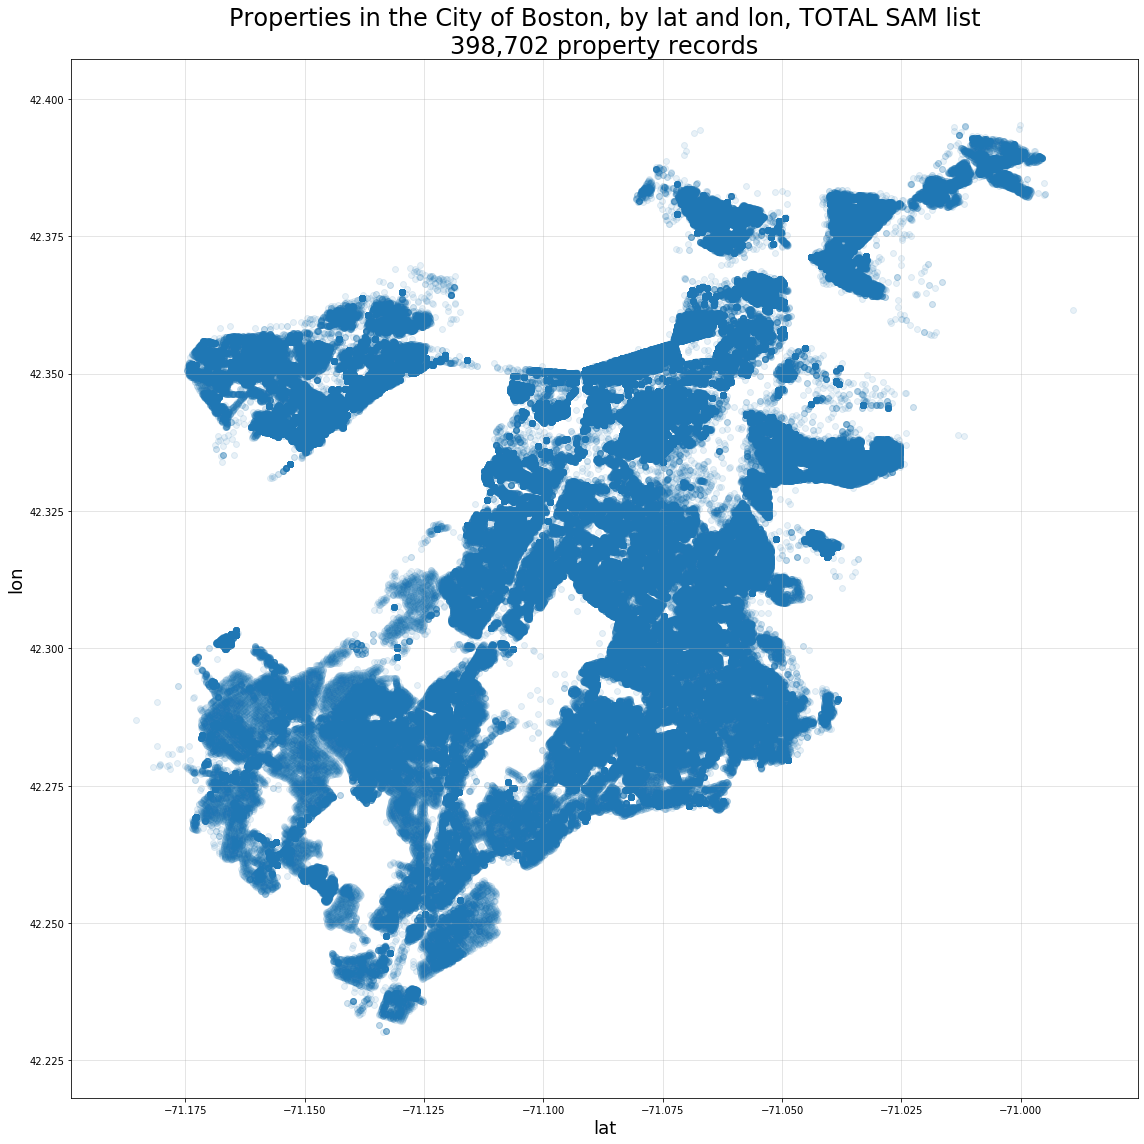

CPU times: user 2.28 s, sys: 11.9 ms, total: 2.29 s
Wall time: 2.29 s


In [116]:
%%time

fig, ax = plt.subplots(figsize=(16,16))
plt.title(
    'Properties in the City of Boston, by lat and lon, TOTAL SAM list\n'\
    '{0:,} property records'.format(len(df_sam)),
    fontsize=24
)
plt.scatter(df_sam['X'], df_sam['Y'], alpha=0.1)
plt.xlabel('lat', fontsize=18)
plt.ylabel('lon', fontsize=18)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.show();

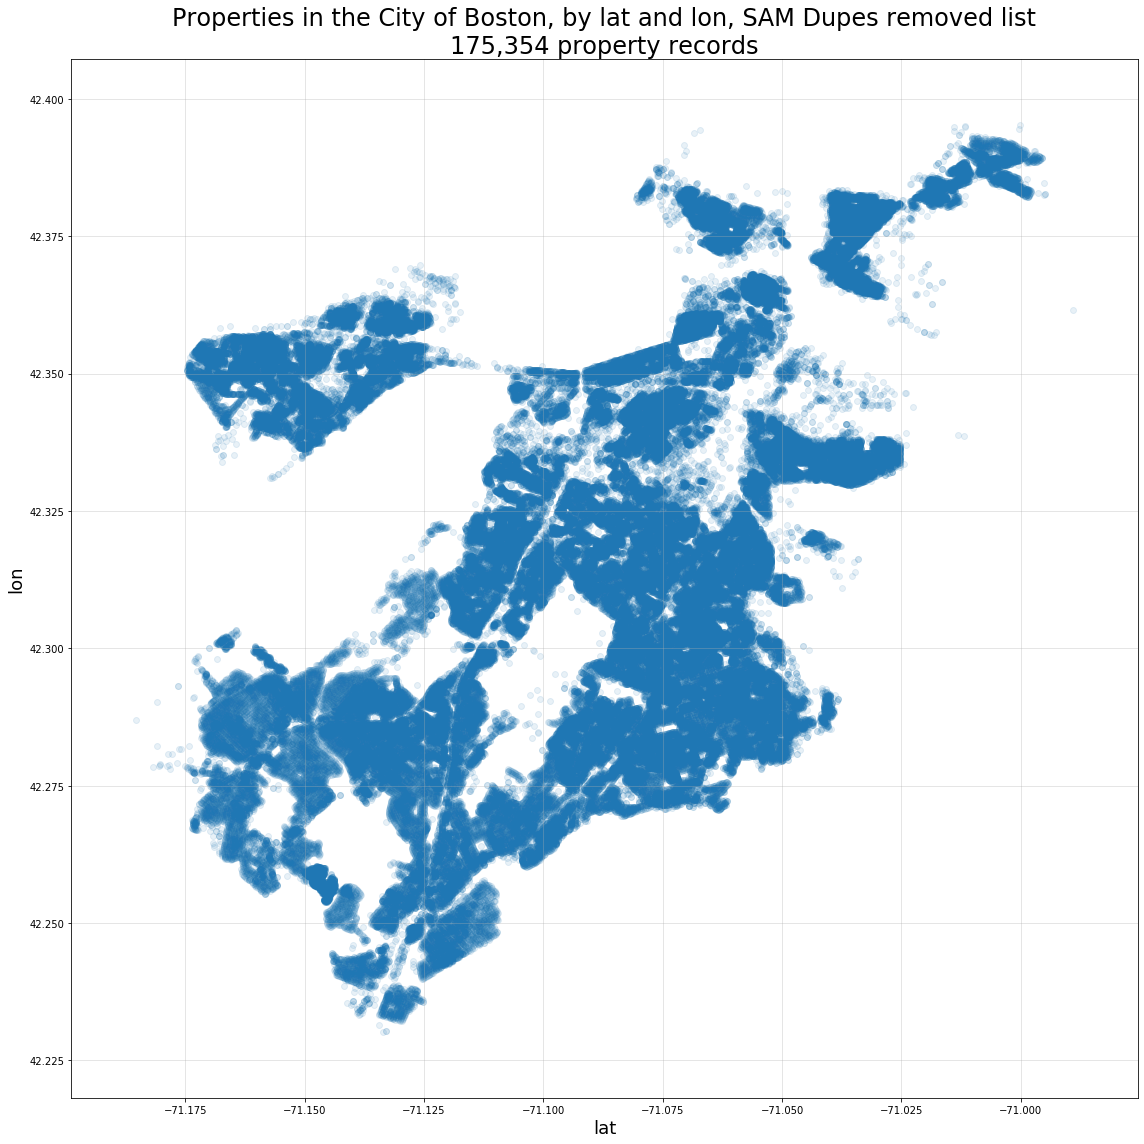

CPU times: user 1.19 s, sys: 3.91 ms, total: 1.19 s
Wall time: 1.19 s


In [233]:
%%time

fig, ax = plt.subplots(figsize=(16,16))
plt.title(
    'Properties in the City of Boston, by lat and lon, SAM Dupes removed list\n'\
    '{0:,} property records'.format(len(df_locs)),
    fontsize=24
)
plt.scatter(df_locs['X'], df_locs['Y'], alpha=0.1)
plt.xlabel('lat', fontsize=18)
plt.ylabel('lon', fontsize=18)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.show();

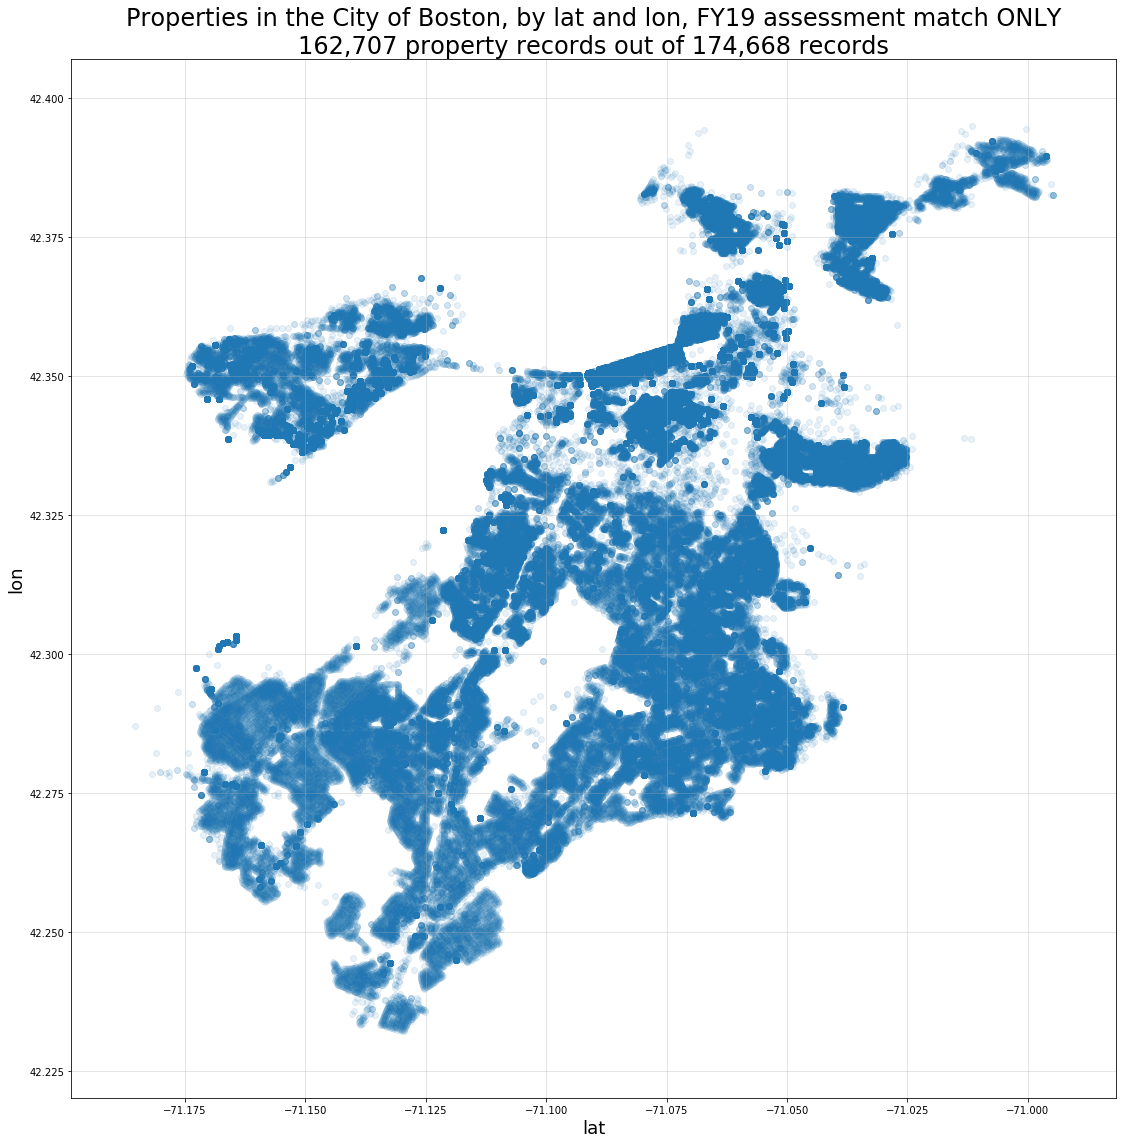

CPU times: user 1.13 s, sys: 7.94 ms, total: 1.14 s
Wall time: 1.14 s


In [237]:
%%time

fig, ax = plt.subplots(figsize=(16,16))
plt.title(
    'Properties in the City of Boston, by lat and lon, FY19 assessment match ONLY\n'\
    '{0:,} property records out of {1:,} records'.format(len(df_merge), len(df_prop)),
    fontsize=24
)
plt.scatter(df_merge['X'], df_merge['Y'], alpha=0.1)
plt.xlabel('lat', fontsize=18)
plt.ylabel('lon', fontsize=18)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.show();

In [238]:
print(df_prop['AV_TOTAL'].astype(float).describe()['mean'])

2518831.209299929


In [239]:
print(df_merge['AV_TOTAL'].astype(float).describe()['mean'])

2598004.208356125


In [240]:
print(df_merge_nomatch['AV_TOTAL'].astype(float).describe()['mean'])

1441830.8617172476


In [244]:
print(df_merge_nomatch.loc[df_merge_nomatch['ZIPCODE']=='02132']['AV_TOTAL'].astype(float).describe()['mean'])

162418.71932114882


ZIP    LOCALE
02132  W Roxbury
02124  Dorchester
02136  Hyde Park
02119  Roxbury

In [241]:
df_merge_nomatch['ZIPCODE'].value_counts()

02132    1532
02124    1032
02136     919
02119     852
02130     763
02125     673
02126     660
02131     606
02121     604
02128     587
02122     512
02129     426
02210     416
02135     387
02127     358
02115     321
02118     269
02120     264
02134     177
02215     125
02111     123
02116     105
02114      69
02110      53
02109      43
02113      39
02467      36
02108       6
02201       2
02112       1
02090       1
Name: ZIPCODE, dtype: int64

In [247]:
df_merge_nomatch.loc[df_merge_nomatch['ZIPCODE']=='02132'].iloc[:, :20]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,OWN_OCC,OWNER,MAIL_ADDRESSEE,MAIL_ADDRESS,MAIL CS,MAIL_ZIPCODE,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX
11216,2000101000,NaN,2000101000,,COHASSET,ST,NaN,02132,986,E,N,ACTION FOR BOSTON COMMUNITY,ACTION FOR BOSTON COMM DEV C,178 TREMONT ST,BOSTON MA,2111,153900,0,153900,0
11258,2000676000,NaN,2000676000,,W ROXBURY,PW,NaN,02132,985,E,N,COMMWLTH OF MASS,,WEST ROXBURY PKWY,ROSLINDALE MA,2131,17976200,0,17976200,0
11339,2001573001,NaN,2001573001,,ANAWAN,AV,NaN,02132,132,RL,N,MICHAELS STEPHEN G,,4 ANAWAN AVE,WEST ROXBURY MA,2132,42300,0,42300,44584
11341,2001594000,NaN,2001594000,,ANAWAN,AV,NaN,02132,132,RL,N,MATTHEWS JOSEPH P,,23 ANAWAN AVE,WEST ROXBURY MA,2132,800,0,800,843
11343,2001603000,NaN,2001603000,,BEECH,ST,NaN,02132,337,CL,N,KYL 400 BELGRADE LLC,,195 LEE ST,BROOKLINE MA,2445,99400,0,99400,248500
11344,2001605000,NaN,2001605000,399,BELGRADE,AV,NaN,02132,132,RL,N,BANKHEAD RICHARD TS,,399 BELGRADE AVE,WEST ROXBURY MA,2132,34200,0,34200,36047
11345,2001608000,NaN,2001608000,,BELGRADE,AV,NaN,02132,132,RL,N,KENNEALLY JOSEPH A,,415 BELGRADE AVE,WEST ROXBURY MA,2132,4400,0,4400,4638
11346,2001613500,NaN,2001613500,,BELGRADE,AV,NaN,02132,986,E,N,MASS BAY TRANS AUTH,,BELGRADE AV,WEST ROXBURY MA,2132,568300,0,568300,0
11347,2001642000,NaN,2001642000,,STRATFORD,ST,NaN,02132,106,RL,N,SETTANA DANIEL R TS,,10 STRATFORD,WEST ROXBURY MA,2132,89400,0,89400,94228
11348,2001655000,NaN,2001655000,,STRATFORD,ST,NaN,02132,132,RL,N,WALSH DANIEL M TS,,29 STRATFORD ST,WEST ROXBURY MA,2132,85200,0,85200,89801


In [252]:
df_merge_nomatch.loc[
    (df_merge_nomatch['ZIPCODE']=='02132') & (df_merge_nomatch['ST_NUM'].str.strip() == '')
].iloc[:, :20]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,OWN_OCC,OWNER,MAIL_ADDRESSEE,MAIL_ADDRESS,MAIL CS,MAIL_ZIPCODE,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX
11216,2000101000,NaN,2000101000,,COHASSET,ST,NaN,02132,986,E,N,ACTION FOR BOSTON COMMUNITY,ACTION FOR BOSTON COMM DEV C,178 TREMONT ST,BOSTON MA,2111,153900,0,153900,0
11258,2000676000,NaN,2000676000,,W ROXBURY,PW,NaN,02132,985,E,N,COMMWLTH OF MASS,,WEST ROXBURY PKWY,ROSLINDALE MA,2131,17976200,0,17976200,0
11339,2001573001,NaN,2001573001,,ANAWAN,AV,NaN,02132,132,RL,N,MICHAELS STEPHEN G,,4 ANAWAN AVE,WEST ROXBURY MA,2132,42300,0,42300,44584
11341,2001594000,NaN,2001594000,,ANAWAN,AV,NaN,02132,132,RL,N,MATTHEWS JOSEPH P,,23 ANAWAN AVE,WEST ROXBURY MA,2132,800,0,800,843
11343,2001603000,NaN,2001603000,,BEECH,ST,NaN,02132,337,CL,N,KYL 400 BELGRADE LLC,,195 LEE ST,BROOKLINE MA,2445,99400,0,99400,248500
11345,2001608000,NaN,2001608000,,BELGRADE,AV,NaN,02132,132,RL,N,KENNEALLY JOSEPH A,,415 BELGRADE AVE,WEST ROXBURY MA,2132,4400,0,4400,4638
11346,2001613500,NaN,2001613500,,BELGRADE,AV,NaN,02132,986,E,N,MASS BAY TRANS AUTH,,BELGRADE AV,WEST ROXBURY MA,2132,568300,0,568300,0
11347,2001642000,NaN,2001642000,,STRATFORD,ST,NaN,02132,106,RL,N,SETTANA DANIEL R TS,,10 STRATFORD,WEST ROXBURY MA,2132,89400,0,89400,94228
11348,2001655000,NaN,2001655000,,STRATFORD,ST,NaN,02132,132,RL,N,WALSH DANIEL M TS,,29 STRATFORD ST,WEST ROXBURY MA,2132,85200,0,85200,89801
11349,2001682000,NaN,2001682000,,PARK,ST,NaN,02132,130,RL,N,GUARINO JOSE M ETAL,,164 PARK,WEST ROXBURY MA,2132,264100,0,264100,278361


In [251]:
df_merge_nomatch.loc[
    (df_merge_nomatch['ZIPCODE']=='02132') & (df_merge_nomatch['ST_NUM'].str.strip() != '')
].iloc[:, :20]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,OWN_OCC,OWNER,MAIL_ADDRESSEE,MAIL_ADDRESS,MAIL CS,MAIL_ZIPCODE,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX
11344,2001605000,NaN,2001605000,399,BELGRADE,AV,NaN,02132,132,RL,N,BANKHEAD RICHARD TS,,399 BELGRADE AVE,WEST ROXBURY MA,2132,34200,0,34200,36047
11356,2001868010,NaN,2001868010,763,W ROXBURY,PW,NaN,02132,101,R1,Y,GARNER CAROL V,,763 WEST ROXBURY PKWY,WEST ROXBURY MA,2132,234100,384700,618800,652215
11357,2001870010,NaN,2001870010,767,W ROXBURY,PW,NaN,02132,906,E,N,ROMAN CATHOLIC ARCHBISHOP,C/O RCAB/REAL ESTATE,2121 COMMONWEALTH AV,BRIGHTON MA,2135,225600,566600,792200,0
11370,2002168004,NaN,2002168004,60,WREN,ST,NaN,02132,132,RL,N,SISTERS OF CHARITY ST MARY,C/O SR RITA FARLEY,58 WREN ST,WEST ROXBURY MA,2132,40500,0,40500,42687
11431,2002843010,NaN,2002843010,32,SPARROW,ST,NaN,02132,101,R1,Y,YANG CHUNHUA,,32 SPARROW ST,WEST ROXBURY MA,2132,158700,614000,772700,814426
11494,2003023000,NaN,2003023000,5061,WASHINGTON,ST,NaN,02132,132,RL,N,TRUSTEES OF ROXBURY LATIN,C/O TRUSTEES OF ROXBURY LATI,101 ST THERESA AV,WEST ROXBURY MA,2132,41200,0,41200,43425
11532,2003106000,NaN,2003106000,70,GROVE,ST,NaN,02132,390,CL,N,S M LORUSSO & SONS INC,,331 WEST ST,WALPOLE MA,2081,169800,0,169800,424500
11535,2003109000,NaN,2003109000,62,GROVE,ST,NaN,02132,132,RL,N,S M LORUSSO & SONS INC,,331 WEST ST,WALPOLE MA,2081,28700,0,28700,30250
11559,2003154000,NaN,2003154000,27,WEDGEMERE,RD,NaN,02132,101,R1,Y,FINNERTY SHEILA A,,27 WEDGEMERE RD,WEST ROXBURY MA,2132,123500,270900,394400,415698
11567,2003181010,NaN,2003181010,43,WOODBRIER,RD,NaN,02132,101,R1,Y,KIESSLING KURT F,C/O KURT & SHEILA KIESSLING,43 WOODBRIER RD,WEST ROXBURY MA,2132,165000,440900,605900,638619
